## DATA 101 - Group Project 
### (Insert Names Here)
#### 12/14/2024

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime as dt
pio.renderers.defaule = 'colab'
from itables import show

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Abstract](#0)<br>
2. [Introduction and Background](#1)<br>
3. [Datasets](#2)<br>
4. [Exploratory Data Analysis](#3)<br>
5. [Proposed Questions](#4)<br>
</div>
<hr>


## Abstract <a id="0"></a>
(Insert abstract after analysis)

---------------

## Introduction and Background <a id="1"></a>

A topic of discussion that bares weight on every american is the overall condition of affordable housing in the United States. We attempt to answer numerous questions regarding the state of affordable housing through analysis of various factors relevant for public policy decision making. 

Our main goal is discover trends that could benefit the allocation of one of the largest grants used for community development and affordable housing. This grant is named the Community Development Block Grant (CDBG). The CDBG program was created under Title I of the Housing and Community Development Act of 1974 to consolidate eight separate federal funding programs designated for housing and urban development and designate the Department of Housing and Urban Development (HUD) responsibility of the program. The hope was to alleviate many challenges previously endured by local governments trying to access funding prior to CDBG. The program's most significant innovation was replacing the highly restrictive "project-by-project" categorical grants with a formula-based entitlement grant, which will be discussed in further detail later in the text. Regulations prioritized the flexible use of funds by local governments to support the development of viable urban communities, improve housing conditions, and expand economic opportunities for low- and moderate-income (LMI) individuals.CDBG funds initially targeted entitlement communities, which include metropolitan cities and urban counties. However, in 1981, Congress amended the program to allow states to administer CDBG funds to smaller Units of General Local Government (UGLG), such as non-entitlement cities and towns. This amendment enhanced the capability of the funds to address specific community needs rather than focusing solely on issues in larger cities. The allocation structure of CDBG designates 70% of the funds directly to entitlement communities (large cities and urban counties) and 30% to states.Although the program offers the benefit of relaxed restrictions compared to other funding avenues, CDBG funds must meet one of the following national objectives as outlined by HUD in order to fund an activity:1. Benefit low- and moderate-income persons2. Aid in the prevention or elimination of slums or blight3. Meet a need having a particular urgency (Urgent Need)As of the 2024 fiscal year, 3.3 billion dollars was allocated to the program, contributing to more than 160 billion dollars in funds made available since its inception. Over 1,800 entitlement communities, as well as numerous non-entitlement entities through state-managed programs, benefit from CDBG-funded activities and the outside investment these funds attract.

----------------

## Datasets <a id="2"></a>

The data we are using derives from the American Community Survey (ACS). The ACS is the current dataset federal, state, and municipalities use for determining where to allocate funds to support public needs. It has been used to inform how trillions of dollars of funds should be used and continues to be updated each year. 

We specifically focus on the 5-Year ACS Estimates Data by County from 2016 to 2020 offered by HUD. Every five years there is a new installment. These are public and presented in a manner than aligns with current data ethical standards. Each question throughout this analysis gathers various columns from each dataset. 

Each will offer a supplementary write-up describing the variable they chose along with why the are relevant. As a disclaimer, the columns from these datasets are coded into names that require interpretation for what they mean. As a result, each question's section will de-code the meaning of the columns they chose. 

Below are the datasets used along with a short summary on what their objectives/uses are.

### CHAS 

[CHAS Website](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::acs-5yr-chas-estimate-data-by-county/about)

The Comprehensive Housing Affordability Strategy (CHAS) serves as the main dataset used by officials for allocating CDBG funds since it documents the number of households experiencing certain housing problems at several income levels (primarily 30, 50, and 80 percent of median income). 

In [12]:
#Load CHAS data
file = 'Datasets/CHAS.csv'
df_CHAS = pd.read_csv(file, dtype = {'GEOID': str,'STATE':str})
show(df_CHAS)

### Demographic

[Demographic Website](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::acs-5yr-demographic-estimate-data-by-county/about)

The 2016-2020 ACS 5-Year estimates of demographic variables, compiled at the county level, include variables that provide details into the make-up of a county's population. Race, age, and education level are amongsts the many variables included within this dataset. 

In [13]:
#Load demographic data
file = 'Datasets/Demographic.csv'
df_Demo = pd.read_csv(file, dtype = {'GEOID': str,'STATE':str})
show(df_Demo)

### Housing

[Housing Website](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::acs-5yr-housing-estimate-data-by-county/about)

2016-2020 ACS 5-Year estimates of housing characteristics, compiled at the county level, include characteristics of housing conditions relevant to understanding the state of home affordabilty, age, and living costs. Such variables are Occupancy Status, Tenure By Household Size, Median Number Of Rooms By Tenure and others.

In [14]:
#Load housing data
file = 'Datasets/Housing.csv'
df_Housing = pd.read_csv(file, dtype = {'GEOID': str,'STATE':str})
show(df_Housing)

### Socioeconomic

[Socioeconomic Website](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::acs-5yr-socioeconomic-estimate-data-by-county/about)

2016-2020 ACS 5-Year estimates of socioeconomic characteristics, compiled at the County level, list the economic conditions of a population where variables such as poverty status, household income, and median family income help public officials determine where to address policies that impact various economic indicators deriving from their population. 

In [15]:
#Load socioeconomic data
file = 'Datasets/Socioeconomic.csv'
df_Socioeconomic = pd.read_csv(file, dtype = {'GEOID': str,'STATE':str})
show(df_Socioeconomic)

### CDBG Spending

[CDBG Website](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::community-development-block-grant-activity/about)

This dataset is seperate from the ACS but still derives from HUD. It denotes the primary point locations of CDBG activities, and provides specific information relative to each award activity. This is essential for tracking where funds are spent, how they are spent, and what they were spent on. This can be crucial for determining how different amounts of fund and what they funded affect indicators of poverty or economic conditions, which can be used for later policy decisions. 

In [19]:
file = 'Datasets/CDBG.csv'
df_CDBG_Spending = pd.read_csv(file, dtype = {'ZIP': str})
show(df_CDBG_Expend)

### CDBG Awards

This dataset also showcases CDBG funds but instead for the amounts awarded to each region by amount and by year. This is essential for looking at differences in funding amount, especially for models that can see whether difference amounts in different regions produce different outcomes. 

In [17]:
file = 'Datasets/GranteeAwards03to24.csv'
df_CDBG_Awards = pd.read_csv(file)
show(df_CDBG_Award)

--------------

## Exploratory Data Analysis <a id="3"></a>

### Evaluating CDBG Awards and Expenditure

Federal expenditure of any kind is under intense scrutiny in the United States, especially after recent developments regarding the establishment of the Department of Government Efficiency being an advisory board for US legislators. We make use of the data provided by HUD to conduct analysis on award trends to see how much is given to entitlments per year.

**Figure 1** below shows a bar chart illustrating the trend of award amounts since 2003, along with a line plot adjusting the amount for inflation. 

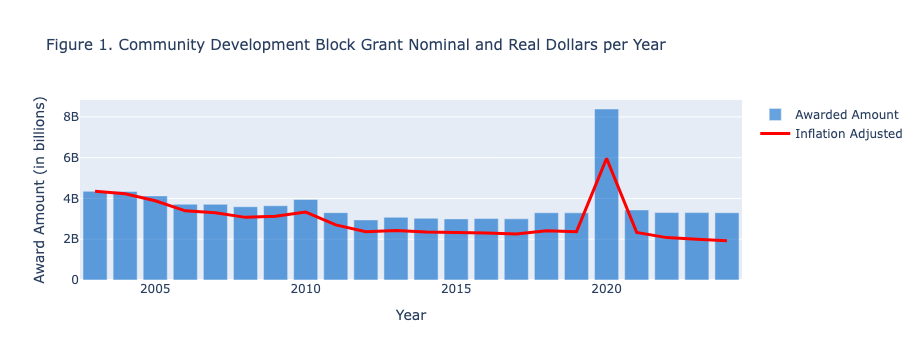

In [42]:
df_CDBG_Award_fig1 = df_CDBG_Award.copy()

#Select columns
df_CDBG_Award_fig1 = df_CDBG_Award_fig1[['Year','Award Amount']]

#Create dataframe featuring CPI per year
CPI_data = {
          'Year':[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],
          'Annual CPI':[184.0,188.9,195.3,201.6,207.3,215.3,214.5,218.1,224.9,229.6,233.0,236.7,237,240,245.1,251.1,255.7,258.8,271,292.7,304.7,314.4]
          }
df_CPI = pd.DataFrame(CPI_data)

#Modify dataframe to include adjusted amounts
df_CDBG_Awards_sum = df_CDBG_Award_fig1.groupby('Year')['Award Amount'].sum().reset_index()
df_awards_merged = pd.merge(df_CDBG_Awards_sum, df_CPI, on = 'Year', how = 'left')
df_awards_merged['Award Amount (Real Dollars)'] = df_awards_merged['Award Amount'] * (184 / df_awards_merged['Annual CPI'])

# Create the histogram trace
bar_chart = go.Bar(
    x = df_CDBG_Awards_sum['Year'], 
    y = df_CDBG_Awards_sum['Award Amount'],
    name = "Awarded Amount", 
    marker=dict(color='rgba(0, 100, 200, 0.6)')  
)

# Create the line plot trace
line_plot = go.Scatter(
    x = df_awards_merged['Year'],
    y = df_awards_merged['Award Amount (Real Dollars)'],
    mode = 'lines',
    name = "Inflation Adjusted",
    line=dict(color='red', width=3)
    )

fig1 = go.Figure(data=[bar_chart, line_plot])

fig1.update_layout(
    title=" Figure 1. Community Development Block Grant Nominal and Real Dollars per Year",
    xaxis_title="Year",
    yaxis_title="Award Amount (in billions)",
    title_font = dict(size = 15),
    barmode='overlay'
    )

fig1.show()

We can see a decline in allocated amounts from 2003 to 2012 where it is then stabilized thereon. However, the purchasing power of these amounts continues to decline. This narrative aids in the need for the re-establishment of reasons why this fund requires attention for Congress when determing the allocation amounts. 

**Figure 2** further looks into the amount of CDBG funds that are awarded to entitlments per state with the inclusion of the amount their recorded spending.

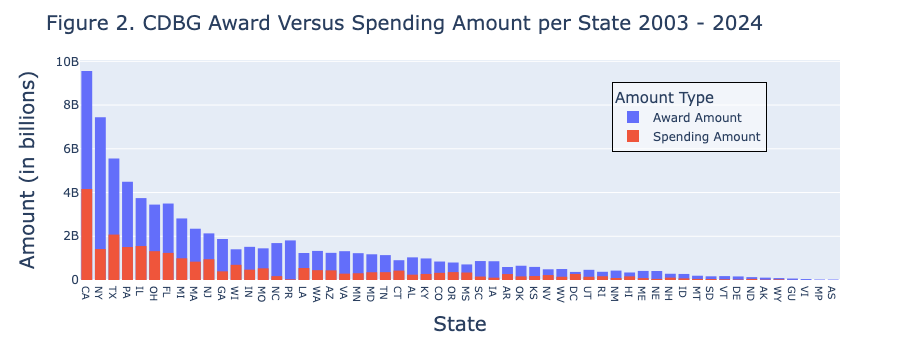

In [44]:
df_CDBG_Award_fig2 = df_CDBG_Award.copy()
df_CDBG_Spend_fig2 = df_CDBG_Spending.copy()

#Select columns from CDBG dataframe:
df_CDBG_Spend_fig2 = df_CDBG_Spend_fig2[['STATE','ACTV_FUNDING_AMT','COMPLETED_DT']]
#Convert df_CDBG COMPLETED_DT to datetime YYYY-MM-DD
df_CDBG_Spend_fig2['COMPLETED_DT'] = pd.to_datetime(df_CDBG_Spend_fig2['COMPLETED_DT'], format='%m/%d/%Y', errors='coerce')
#Drop NaN times
df_CDBG_Spend_fig2.dropna(subset = ['COMPLETED_DT'], axis = 0, inplace = True)
#Only select dates from 2003 to 2023 then plot
filtered_df_CDBG_Spending = df_CDBG_Spend_fig2[df_CDBG_Spend_fig2['COMPLETED_DT'].dt.year.between(2003,2023)]
#Aggragate funding spent by state
state_spent_sum = filtered_df_CDBG_Spending.groupby('STATE')['ACTV_FUNDING_AMT'].sum().reset_index()

#Select relevant columns from Awards df
df_CDBG_Award_fig2 = df_CDBG_Award_fig2[['Year','State','Award Amount']]
#Convert df_CDBG COMPLETED_DT to datetime YYYY-MM-DD
df_CDBG_Award_fig2['Year'] = pd.to_datetime(df_CDBG_Award_fig2['Year'], format='%Y', errors='coerce')
#Only select from 2003 to 2023
filtered_df_CDBG_awards = df_CDBG_Award_fig2[df_CDBG_Award_fig2['Year'].dt.year.between(2003,2023)]
#Aggregate funding awarded by state
state_award_sum = filtered_df_CDBG_awards.groupby('State')['Award Amount'].sum().reset_index()
#Change column title for state_award_sum from State to STATE
state_award_sum.rename(columns = {'State':'STATE'}, inplace = True)
#Change column title for state_spent_sum from ACTV_FUNDING_AMT to Spending Amount
state_spent_sum.rename(columns = {'ACTV_FUNDING_AMT':'Spending Amount'}, inplace = True)
#Merge datasets
df_merged = pd.merge(state_award_sum, state_spent_sum, on = 'STATE', how = 'outer')

#Create plot
fig2 = px.histogram(df_merged,
                   x = 'STATE',
                   y = ['Award Amount', 'Spending Amount'])
fig2.update_layout(xaxis={'categoryorder':'total descending'},
                  title = 'Figure 2. CDBG Award Versus Spending Amount per State 2003 - 2024',
                  xaxis_title = 'State',
                  yaxis_title = 'Amount (in billions)',
                  barmode = 'overlay',
                  legend_title = "Amount Type",
                  title_font = dict(size = 20),  
                  xaxis_title_font = dict(size = 20),  
                  yaxis_title_font = dict(size = 20),  
                  xaxis_tickfont = dict(size = 10), 
                  yaxis_tickfont = dict(size = 12),
                  legend=dict(
                  x = 0.7,  
                  y = 0.9,
                  font = dict(size = 12),  
                  title_font = dict(size = 15),
                  bgcolor = 'rgba(255, 255, 255, 0.5)', 
                  bordercolor = 'black',  
                  borderwidth = 1,  
                  orientation = 'v',
                  ))
fig2.show()

All states recorded spending no where close to what they were awarded. However, an even larger anomaly is how much greater California's reported amount spent is compared to every other state. This prompted us to contrain our analysis of affordable housing, poverty, and econmomic factors to just California. 

## Proposed Questions <a id="4"></a>

Isolating our analysis to just California counties, each member of our project proposed a question for which they aimed to answer given the 5-Year ACS data. Our hope is that we develope reproducable conclusions from each question which we can make a general conlusion involving all of our analyses. Below is each proposed question from every member:

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Elijah Landa: Which counties in California have the highest percentage of households facing affordability issues?](#5)<br>
2. [Introduction and Background](#6)<br>
3. [Datasets](#7)<br>
4. [Exploratory Data Analysis](#8)<br>
</div>
<hr>

## Elijah Landa: Which counties in California have the highest percentage of households facing affordability issues? <a id="5"></a>

The question I proposed was which counties in the state of California have the highest level of households that are having affordability issues. I also wanted to see if any other variables could be the reason for high affordability issues. The dataset I chose and thought would relate to my question the most was the Socioeconomic set. I reviewed the data set to find which columns would relate the most to my question. I decided to go with the Poverty Rate for every county. Then I wanted to see if any variables could be connected to the poverty rate. I decided to go with the unemployment rate, the average income rate, and Civilians who are 25-64 and highest level of education is high school. 

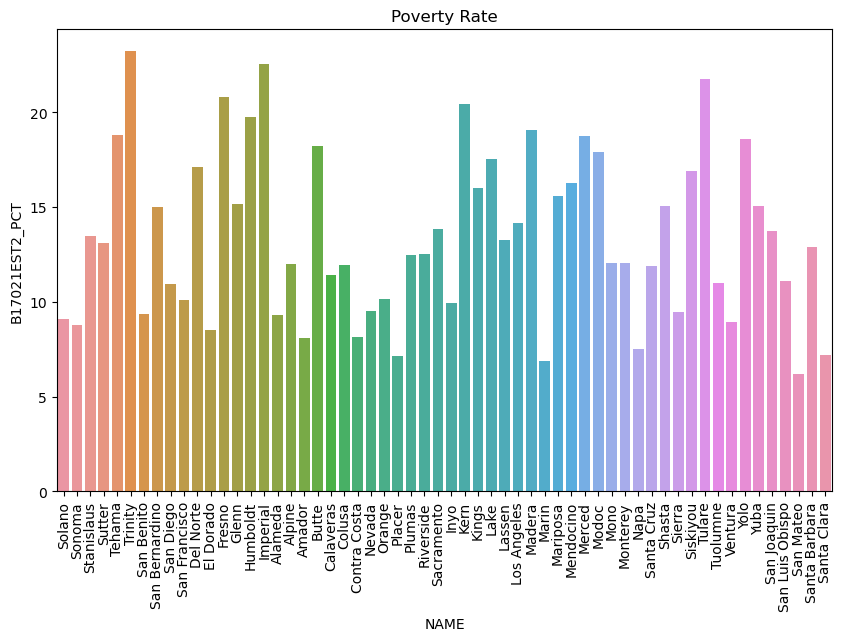

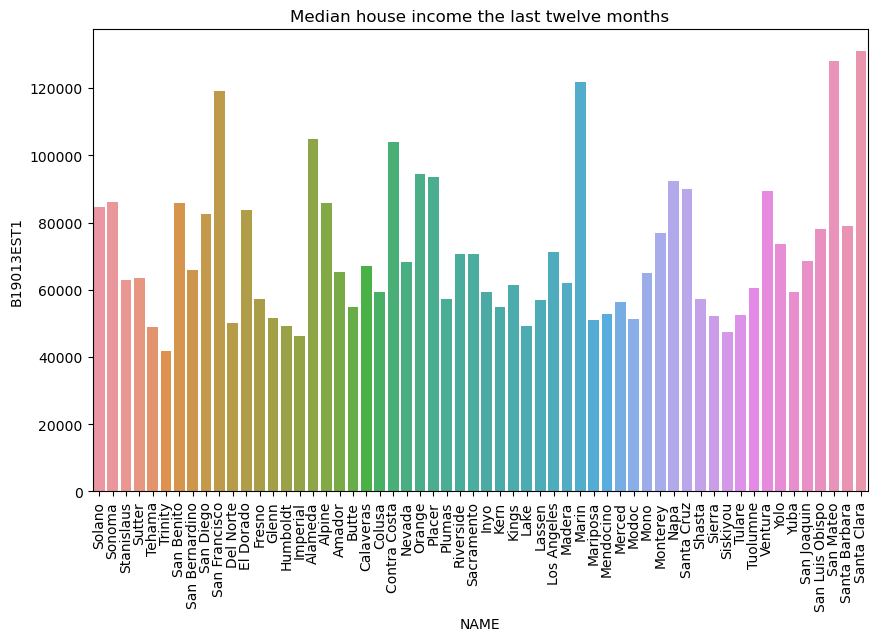

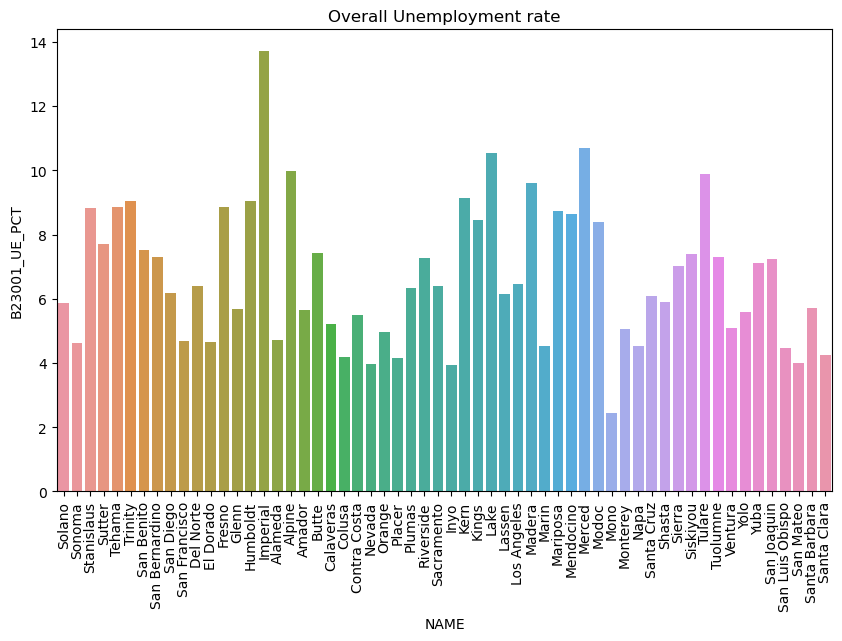

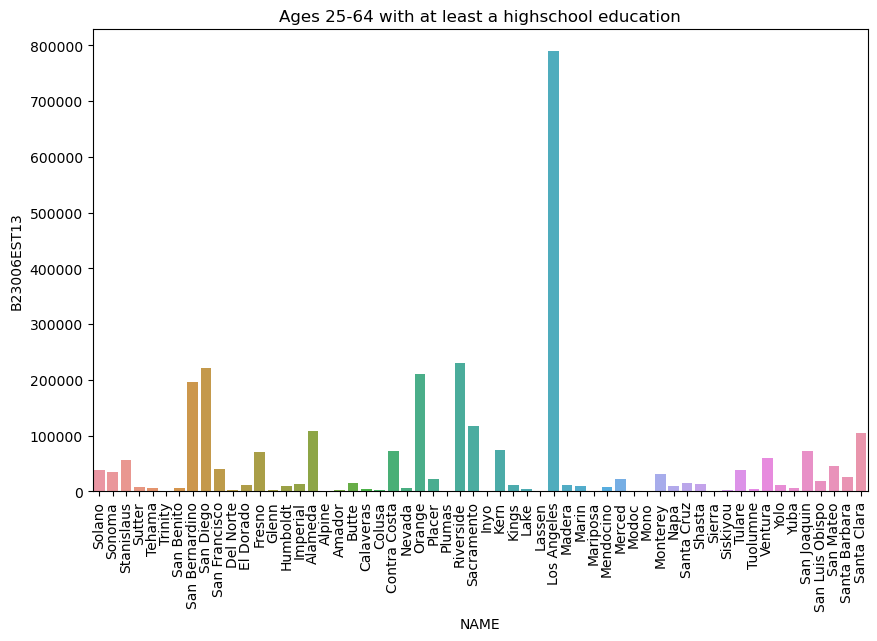

In [49]:
# Load the data
df = pd.read_csv('Datasets/Socioeconomic.csv')

mask = df['STATE'] == 6
df = df[mask]

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numeric_columns].describe()

# Check correlations
correlation_matrix = df[numeric_columns].corr()

# Basic visualization of key demographic and housing data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Poverty Rate
plt.figure(figsize=(10,6))
sns.barplot(x='NAME', y='B17021EST2_PCT', data=df)
plt.title('Poverty Rate')
plt.xticks(rotation=90)
plt.show()

# Plot Median house income the last twelve months
plt.figure(figsize=(10,6))
sns.barplot(x='NAME', y='B19013EST1', data=df)
plt.title('Median house income the last twelve months')
plt.xticks(rotation=90)
plt.show()

# Overall Unemployment rate
plt.figure(figsize=(10,6))
sns.barplot(x='NAME', y='B23001_UE_PCT', data=df)
plt.title('Overall Unemployment rate')
plt.xticks(rotation=90)
plt.show()

# Ages 25-64 with at least a highschool education 
plt.figure(figsize=(10,6))
sns.barplot(x='NAME', y='B23006EST13', data=df)
plt.title('Ages 25-64 with at least a highschool education')
plt.xticks(rotation=90)
plt.show()

After reviewing the bar graphs I had created, Trinity was the county I was most intrigued by. Trinity seemed to have common factors in all four graphs. The first graph showed that Trinity had the highest poverty level, and when it came to household income, Trinity had the lowest out of all the counties. Trinity was also one of the highest for unemployment, which could correlate to income leading to poverty. For the last graph, I decided to see the overall rate of people with at least a high school level of education and Trinity mind-blowingly had the lowest. After analyzing Trinity I decided to look at other counties to see whether or not they had similar variables leading to poverty. It appeared that most of the counties with high poverty rates also had high unemployment, as well as low income, and typically didn't have a high school level education.